In [ ]:
# This notebook constructs a "Happy Birthday" configuration of Rydberg atoms 
# The actual atom configuration was generated 'by-hand' using the create_graph.html webpage

In [1]:
# import basics and ahs specific components
import numpy as np
import matplotlib.pyplot as plt
from braket.ahs.atom_arrangement import AtomArrangement
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation
from ahs_utils import show_register, show_global_drive, show_final_avg_density, get_drive, get_ground_prob, get_avg_density
from braket.devices import LocalSimulator
from braket.aws import AwsDevice 

# Sets the device to Aquila - QuEra's first public QPU
qpu = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")

# Gives us the capabilities of Aquila
capabilities = qpu.properties.paradigm
rydberg = capabilities.rydberg
rydberg

Rydberg(c6Coefficient=Decimal('5.42E-24'), rydbergGlobal=RydbergGlobal(rabiFrequencyRange=(Decimal('0.0'), Decimal('15800000.0')), rabiFrequencyResolution=Decimal('400.0'), rabiFrequencySlewRateMax=Decimal('250000000000000.0'), detuningRange=(Decimal('-125000000.0'), Decimal('125000000.0')), detuningResolution=Decimal('0.2'), detuningSlewRateMax=Decimal('2500000000000000.0'), phaseRange=(Decimal('-99.0'), Decimal('99.0')), phaseResolution=Decimal('5E-7'), timeResolution=Decimal('1E-9'), timeDeltaMin=Decimal('5E-8'), timeMin=Decimal('0.0'), timeMax=Decimal('0.000004')))

In [2]:
data = [
  {
    "x": 0,
    "y": 0
  },
  {
    "x": 0,
    "y": 20
  },
  {
    "x": 0,
    "y": 40
  },
  {
    "x": 0,
    "y": 60
  },
  {
    "x": 0,
    "y": 80
  },
  {
    "x": 20,
    "y": 40
  },
  {
    "x": 40,
    "y": 40
  },
  {
    "x": 40,
    "y": 20
  },
  {
    "x": 40,
    "y": 0
  },
  {
    "x": 40,
    "y": 60
  },
  {
    "x": 40,
    "y": 80
  },
  {
    "x": 80,
    "y": 60
  },
  {
    "x": 100,
    "y": 40
  },
  {
    "x": 120,
    "y": 40
  },
  {
    "x": 120,
    "y": 60
  },
  {
    "x": 120,
    "y": 80
  },
  {
    "x": 100,
    "y": 80
  },
  {
    "x": 80,
    "y": 80
  },
  {
    "x": 160,
    "y": 40
  },
  {
    "x": 160,
    "y": 60
  },
  {
    "x": 160,
    "y": 80
  },
  {
    "x": 160,
    "y": 100
  },
  {
    "x": 180,
    "y": 40
  },
  {
    "x": 200,
    "y": 40
  },
  {
    "x": 200,
    "y": 60
  },
  {
    "x": 200,
    "y": 80
  },
  {
    "x": 180,
    "y": 80
  },
  {
    "x": 160,
    "y": 120
  },
  {
    "x": 240,
    "y": 40
  },
  {
    "x": 240,
    "y": 60
  },
  {
    "x": 240,
    "y": 80
  },
  {
    "x": 240,
    "y": 100
  },
  {
    "x": 240,
    "y": 120
  },
  {
    "x": 260,
    "y": 40
  },
  {
    "x": 280,
    "y": 40
  },
  {
    "x": 280,
    "y": 60
  },
  {
    "x": 280,
    "y": 80
  },
  {
    "x": 260,
    "y": 80
  },
  {
    "x": 320,
    "y": 40
  },
  {
    "x": 320,
    "y": 60
  },
  {
    "x": 320,
    "y": 80
  },
  {
    "x": 340,
    "y": 80
  },
  {
    "x": 340,
    "y": 60
  },
  {
    "x": 340,
    "y": 40
  },
  {
    "x": 320,
    "y": 100
  },
  {
    "x": 300,
    "y": 120
  },
  {
    "x": 0,
    "y": 160
  },
  {
    "x": 0,
    "y": 180
  },
  {
    "x": 0,
    "y": 200
  },
  {
    "x": 0,
    "y": 220
  },
  {
    "x": 0,
    "y": 240
  },
  {
    "x": 20,
    "y": 160
  },
  {
    "x": 40,
    "y": 180
  },
  {
    "x": 40,
    "y": 200
  },
  {
    "x": 20,
    "y": 200
  },
  {
    "x": 20,
    "y": 240
  },
  {
    "x": 40,
    "y": 220
  },
  {
    "x": 80,
    "y": 200
  },
  {
    "x": 80,
    "y": 220
  },
  {
    "x": 80,
    "y": 240
  },
  {
    "x": 100,
    "y": 240
  },
  {
    "x": 120,
    "y": 240
  },
  {
    "x": 120,
    "y": 220
  },
  {
    "x": 120,
    "y": 200
  },
  {
    "x": 100,
    "y": 200
  },
  {
    "x": 120,
    "y": 180
  },
  {
    "x": 120,
    "y": 160
  },
  {
    "x": 160,
    "y": 220
  },
  {
    "x": 180,
    "y": 200
  },
  {
    "x": 200,
    "y": 200
  },
  {
    "x": 200,
    "y": 220
  },
  {
    "x": 200,
    "y": 240
  },
  {
    "x": 180,
    "y": 240
  },
  {
    "x": 160,
    "y": 240
  },
  {
    "x": 240,
    "y": 200
  },
  {
    "x": 240,
    "y": 220
  },
  {
    "x": 240,
    "y": 240
  },
  {
    "x": 260,
    "y": 240
  },
  {
    "x": 260,
    "y": 220
  },
  {
    "x": 260,
    "y": 200
  },
  {
    "x": 240,
    "y": 260
  },
  {
    "x": 220,
    "y": 280
  },
  {
    "x": 300,
    "y": 160
  },
  {
    "x": 300,
    "y": 180
  },
  {
    "x": 300,
    "y": 200
  },
  {
    "x": 300,
    "y": 220
  },
  {
    "x": 300,
    "y": 240
  },
  {
    "x": 300,
    "y": 280
  },
  {
    "x": 280,
    "y": 280
  },
  {
    "x": 280,
    "y": 300
  },
  {
    "x": 300,
    "y": 300
  },
  {
    "x": 300,
    "y": 320
  },
  {
    "x": 280,
    "y": 320
  },
  {
    "x": 320,
    "y": 320
  },
  {
    "x": 320,
    "y": 300
  },
  {
    "x": 320,
    "y": 280
  }
]



In [77]:
old_data=[
  {
    "x": 35,
    "y": 32.56666564941406
  },
  {
    "x": 34,
    "y": 55.56666564941406
  },
  {
    "x": 33,
    "y": 74.56666564941406
  },
  {
    "x": 50,
    "y": 55.56666564941406
  },
  {
    "x": 68,
    "y": 32.56666564941406
  },
  {
    "x": 68,
    "y": 54.56666564941406
  },
  {
    "x": 66,
    "y": 75.56666564941406
  },
  {
    "x": 108,
    "y": 51.56666564941406
  },
  {
    "x": 91,
    "y": 50.56666564941406
  },
  {
    "x": 88,
    "y": 66.56666564941406
  },
  {
    "x": 99,
    "y": 78.56666564941406
  },
  {
    "x": 110,
    "y": 66.56666564941406
  },
  {
    "x": 130,
    "y": 47.56666564941406
  },
  {
    "x": 127,
    "y": 66.56666564941406
  },
  {
    "x": 127,
    "y": 83.56666564941406
  },
  {
    "x": 128,
    "y": 100.56666564941406
  },
  {
    "x": 143,
    "y": 46.56666564941406
  },
  {
    "x": 157,
    "y": 52.56666564941406
  },
  {
    "x": 154,
    "y": 71.56666564941406
  },
  {
    "x": 183,
    "y": 46.56666564941406
  },
  {
    "x": 182,
    "y": 63.56666564941406
  },
  {
    "x": 182,
    "y": 82.56666564941406
  },
  {
    "x": 180,
    "y": 98.56666564941406
  },
  {
    "x": 200,
    "y": 46.56666564941406
  },
  {
    "x": 209,
    "y": 58.56666564941406
  },
  {
    "x": 202,
    "y": 72.56666564941406
  },
  {
    "x": 230,
    "y": 44.56666564941406
  },
  {
    "x": 231,
    "y": 62.56666564941406
  },
  {
    "x": 241,
    "y": 75.56666564941406
  },
  {
    "x": 257,
    "y": 44.56666564941406
  },
  {
    "x": 252,
    "y": 59.56666564941406
  },
  {
    "x": 231,
    "y": 90.56666564941406
  },
  {
    "x": 218,
    "y": 107.56666564941406
  },
  {
    "x": 30,
    "y": 135.56666564941406
  },
  {
    "x": 29,
    "y": 154.56666564941406
  },
  {
    "x": 29,
    "y": 173.56666564941406
  },
  {
    "x": 28,
    "y": 189.56666564941406
  },
  {
    "x": 45,
    "y": 134.56666564941406
  },
  {
    "x": 58,
    "y": 146.56666564941406
  },
  {
    "x": 47,
    "y": 160.56666564941406
  },
  {
    "x": 53,
    "y": 173.56666564941406
  },
  {
    "x": 52,
    "y": 191.56666564941406
  },
  {
    "x": 38,
    "y": 198.56666564941406
  },
  {
    "x": 82,
    "y": 171.56666564941406
  },
  {
    "x": 80,
    "y": 187.56666564941406
  },
  {
    "x": 84,
    "y": 143.56666564941406
  },
  {
    "x": 105,
    "y": 170.56666564941406
  },
  {
    "x": 105,
    "y": 185.56666564941406
  },
  {
    "x": 101,
    "y": 201.56666564941406
  },
  {
    "x": 118,
    "y": 175.56666564941406
  },
  {
    "x": 128,
    "y": 181.56666564941406
  },
  {
    "x": 153,
    "y": 144.56666564941406
  },
  {
    "x": 152,
    "y": 164.56666564941406
  },
  {
    "x": 151,
    "y": 183.56666564941406
  },
  {
    "x": 149,
    "y": 199.56666564941406
  },
  {
    "x": 166,
    "y": 164.56666564941406
  },
  {
    "x": 136,
    "y": 163.56666564941406
  },
  {
    "x": 189,
    "y": 142.56666564941406
  },
  {
    "x": 188,
    "y": 162.56666564941406
  },
  {
    "x": 187,
    "y": 175.56666564941406
  },
  {
    "x": 187,
    "y": 194.56666564941406
  },
  {
    "x": 200,
    "y": 165.56666564941406
  },
  {
    "x": 212,
    "y": 172.56666564941406
  },
  {
    "x": 214,
    "y": 192.56666564941406
  },
  {
    "x": 246,
    "y": 171.56666564941406
  },
  {
    "x": 231,
    "y": 181.56666564941406
  },
  {
    "x": 242,
    "y": 197.56666564941406
  },
  {
    "x": 258,
    "y": 186.56666564941406
  },
  {
    "x": 261,
    "y": 155.56666564941406
  },
  {
    "x": 260,
    "y": 132.56666564941406
  },
  {
    "x": 282,
    "y": 171.56666564941406
  },
  {
    "x": 300,
    "y": 170.56666564941406
  },
  {
    "x": 282,
    "y": 190.56666564941406
  },
  {
    "x": 291,
    "y": 201.56666564941406
  },
  {
    "x": 301,
    "y": 187.56666564941406
  },
  {
    "x": 324,
    "y": 167.56666564941406
  },
  {
    "x": 323,
    "y": 190.56666564941406
  },
  {
    "x": 350,
    "y": 167.56666564941406
  },
  {
    "x": 340,
    "y": 187.56666564941406
  },
  {
    "x": 329,
    "y": 206.56666564941406
  },
  {
    "x": 315,
    "y": 231.56666564941406
  },
  {
    "x": 31,
    "y": 250.56666564941406
  },
  {
    "x": 38,
    "y": 265.56666564941406
  },
  {
    "x": 46,
    "y": 278.56666564941406
  },
  {
    "x": 64,
    "y": 246.56666564941406
  },
  {
    "x": 57,
    "y": 262.56666564941406
  },
  {
    "x": 45,
    "y": 294.56666564941406
  },
  {
    "x": 45,
    "y": 313.56666564941406
  },
  {
    "x": 96,
    "y": 277.56666564941406
  },
  {
    "x": 79,
    "y": 285.56666564941406
  },
  {
    "x": 78,
    "y": 303.56666564941406
  },
  {
    "x": 94,
    "y": 308.56666564941406
  },
  {
    "x": 105,
    "y": 292.56666564941406
  },
  {
    "x": 127,
    "y": 276.56666564941406
  },
  {
    "x": 125,
    "y": 298.56666564941406
  },
  {
    "x": 125,
    "y": 313.56666564941406
  },
  {
    "x": 143,
    "y": 286.56666564941406
  },
  {
    "x": 158,
    "y": 297.56666564941406
  },
  {
    "x": 157,
    "y": 311.56666564941406
  },
  {
    "x": 187,
    "y": 272.56666564941406
  },
  {
    "x": 185,
    "y": 293.56666564941406
  },
  {
    "x": 183,
    "y": 311.56666564941406
  },
  {
    "x": 202,
    "y": 281.56666564941406
  },
  {
    "x": 214,
    "y": 294.56666564941406
  },
  {
    "x": 215,
    "y": 311.56666564941406
  },
  {
    "x": 241,
    "y": 288.56666564941406
  },
  {
    "x": 240,
    "y": 309.56666564941406
  },
  {
    "x": 240,
    "y": 263.56666564941406
  },
  {
    "x": 282,
    "y": 283.56666564941406
  },
  {
    "x": 263,
    "y": 285.56666564941406
  },
  {
    "x": 266,
    "y": 304.56666564941406
  },
  {
    "x": 282,
    "y": 309.56666564941406
  },
  {
    "x": 308,
    "y": 260.56666564941406
  },
  {
    "x": 307,
    "y": 283.56666564941406
  },
  {
    "x": 306,
    "y": 301.56666564941406
  },
  {
    "x": 305,
    "y": 317.56666564941406
  },
  {
    "x": 336,
    "y": 277.56666564941406
  },
  {
    "x": 322,
    "y": 288.56666564941406
  },
  {
    "x": 325,
    "y": 307.56666564941406
  },
  {
    "x": 336,
    "y": 320.56666564941406
  }
]



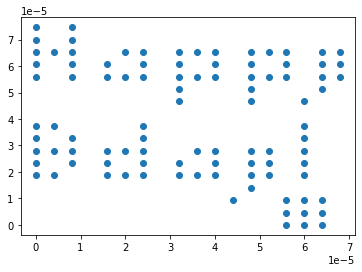

In [3]:
import matplotlib.pyplot as plt

x_values = [(d["x"]*70e-6/350) for d in data]
y_values = [((-1*d["y"]+320)*70e-6/300) for d in data]

# Creating a scatter plot using Matplotlib
plt.scatter(x_values, y_values)

# Adding labels and title
# plt.xlabel("X values")
# plt.ylabel("Y values")
# plt.title("Scatter plot of X vs Y")

# Displaying the plot
plt.show()

In [4]:
x_vals = np.array(x_values)
y_vals = np.array(y_values)
ordered_pairs = [np.array([x,y]) for x, y in zip(x_vals, y_vals)]

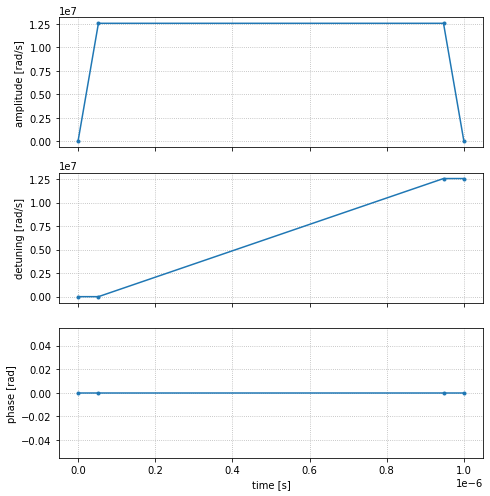

In [5]:
# Hamiltonian drive construction

total_time = 1.0e-6 # total evolution time in s

max_slew = float(rydberg.rydbergGlobal.rabiFrequencySlewRateMax) # rad/s^2 advised to only use 95% of max for now
omega_min= 0  # rad/s
omega_max = np.pi*4.0e6 # rad/s
ramp_time = omega_max/(max_slew*0.95) # microseconds

time_points = [0, ramp_time, total_time-ramp_time, total_time]

detuning_min = omega_min
detuning_max = omega_max 

omega_values = [omega_min, omega_max, omega_max, omega_min]  # piecewise linear
detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max]  # piecewise linear

phase_values = [0, 0, 0, 0]  # piecewise constant
drive = get_drive(time_points, omega_values, detuning_values, phase_values)

# We can view the drive pattern by running the below function.
show_global_drive(drive)

In [6]:
# Define the Rydberg blockade radius corresponding to our previously defined Omega
c6 = float(rydberg.dict()["c6Coefficient"])
Rb = (c6/omega_max)**(1/6)
Rb

8.69223722541915e-06

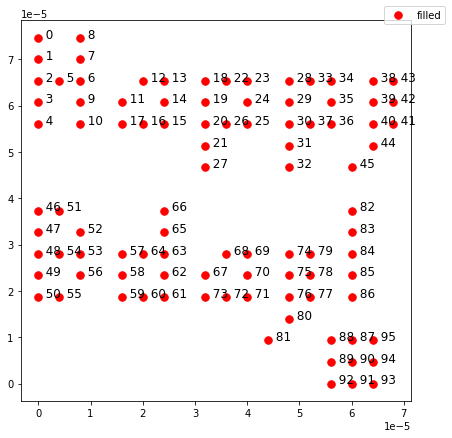

In [7]:
# Now we create the register of atoms
atoms = AtomArrangement()

# Construct the birthday atom configuration
for i in range(len(ordered_pairs)):

    atoms.add(ordered_pairs[i])

# View the arrangement of atoms. Use blockade_radius=Rb to draw connecting line between blockaded atoms
show_register(atoms)

In [8]:
ahs_program = AnalogHamiltonianSimulation(
    register=atoms, 
    hamiltonian=drive
)

d_ahs_program = ahs_program.discretize(qpu)
shots = 1000 # or maybe this should be set to your age?
qpu_task = qpu.run(d_ahs_program, shots=shots)

In [11]:
task_metadata = qpu_task.metadata()
task_arn = task_metadata['quantumTaskArn']
task_status = task_metadata['status']

In [13]:
print(task_arn)

arn:aws:braket:us-east-1:592242689881:quantum-task/fb4ae8e9-3a1e-49a0-8a98-7a1b570ba996


In [12]:
print(task_status)

CREATED
